In [1]:
# -*- coding: utf-8 -*-
# Indentation: Jupyter Notebook

'''
Dog Breed Prediction
'''

__version__ = 1.0
__author__ = "Sourav Raj"
__author_email__ = "souravraj.iitbbs@gmail.com"

In [3]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"souravrajiitbbs","key":"c0cd3337dda8191f31cadbf2072494d3"}'}

In [4]:
!pip install -q kaggle

In [5]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           2016          6  0.1764706        


In [10]:
!mkdir dog_dataset 
%cd dog_dataset

/content/dog_dataset


In [11]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp

 96% 665M/691M [00:18<00:00, 28.9MB/s]
100% 691M/691M [00:18<00:00, 39.3MB/s]


In [13]:
!unzip dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: dog_dataset/train/840dbad5

In [23]:
# Important library imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [16]:
breed_labels = pd.read_csv("dog_dataset/labels.csv")
print(breed_labels.shape)
breed_labels.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [17]:
# Visualize the number of each breeds
breed_labels["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [18]:
# Selecting first 3 breeds (Limitation due to computation power)
BREED_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
breeds = breed_labels[(breed_labels['breed'].isin(BREED_NAMES))]
breeds = breeds.reset_index()
breeds.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [24]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(breeds), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(breeds['breed'], classes = BREED_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(breeds))):
    img = load_img(f"dog_dataset/train/{breeds['id'][i]}.jpg", target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 357/357 [00:01<00:00, 325.74it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


In [27]:
import sys
sys.path.append('../src/')
from model import model_creation
from keras.optimizers import Adam

model = model_creation(input_shape=(224,224,3), output_shape=len(BREED_NAMES))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0

In [28]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [29]:
# Training the model
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/100
2/2 [==============================] - 14s 2s/step - loss: 4.8972 - accuracy: 0.3438 - val_loss: 4.8784 - val_accuracy: 0.2923
Epoch 2/100
2/2 [==============================] - 1s 393ms/step - loss: 4.8704 - accuracy: 0.3945 - val_loss: 4.8520 - val_accuracy: 0.3231
Epoch 3/100
2/2 [==============================] - 1s 501ms/step - loss: 4.8444 - accuracy: 0.3906 - val_loss: 4.8255 - val_accuracy: 0.3538
Epoch 4/100
2/2 [==============================] - 1s 393ms/step - loss: 4.8183 - accuracy: 0.3906 - val_loss: 4.7992 - val_accuracy: 0.4000
Epoch 5/100
2/2 [==============================] - 1s 413ms/step - loss: 4.7922 - accuracy: 0.3945 - val_loss: 4.7730 - val_accuracy: 0.4000
Epoch 6/100
2/2 [==============================] - 1s 438ms/step - loss: 4.7662 - accuracy: 0.3945 - val_loss: 4.7462 - val_accuracy: 0.4000
Epoch 7/100
2/2 [==============================] - 1s 386ms/step - loss: 4.7398 - accuracy: 0.3906 - val_loss: 4.7191 - val_accuracy: 0.4154
Epoch 8/100
2/2

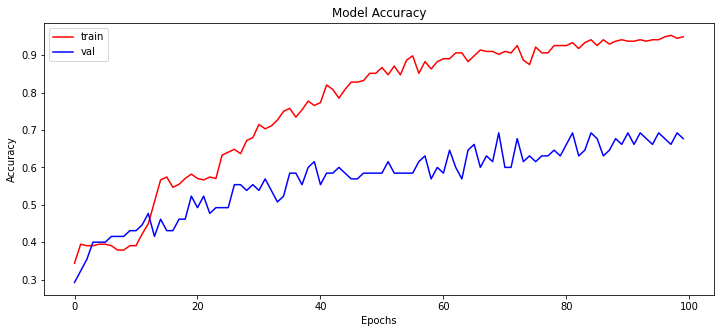

In [30]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

2/2 [==============================] - 0s 12ms/step - loss: 3.1673 - accuracy: 0.6944
Accuracy over the test set: 69.44%


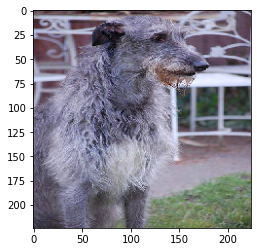

Originally :  boston_bull
Predicted :  boston_bull


In [31]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(f'Accuracy over the test set: {round((score[1]*100), 2)}%')
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",breed_labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",breed_labels['breed'][np.argmax(Y_pred[1])])


In [37]:
model.save('dog-breed.h5')

In [39]:
!pwd

/content/dog_dataset
